### Resampling time series data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("Data/chemical-concentration-readings.csv", parse_dates=True, index_col=0)
df.head()

,Chemical conc.
Timestamp,
1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,17.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 1975-01-01 00:00:00 to 1975-01-17 08:00:00
Data columns (total 1 columns):
Chemical conc.    197 non-null float64
dtypes: float64(1)
memory usage: 3.1 KB


In [5]:
#Resample and compute daily mean
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

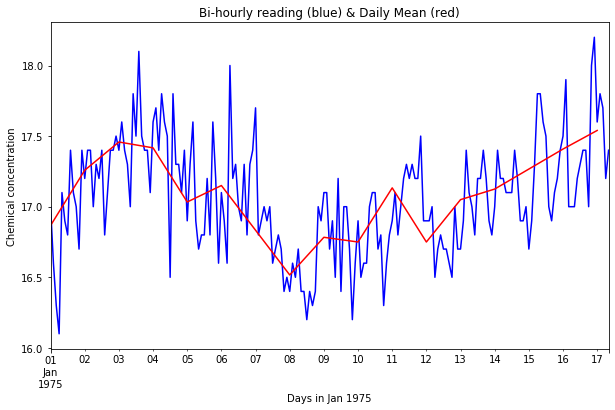

In [6]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)

df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')

ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Days in Jan 1975')
ax.set_ylabel('Chemical concentration')

plt.show()

### Group wise aggregation

In [7]:
df= pd.read_csv("Data/mean-daily-temperature-fisher-river.csv", parse_dates=["Date"])
df.head()

,Date,Mean temparature
0,1988-01-01,-23.0
1,1988-01-02,-20.5
2,1988-01-03,-22.0
3,1988-01-04,-30.5
4,1988-01-05,-31.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
Date                1461 non-null datetime64[ns]
Mean temparature    1461 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


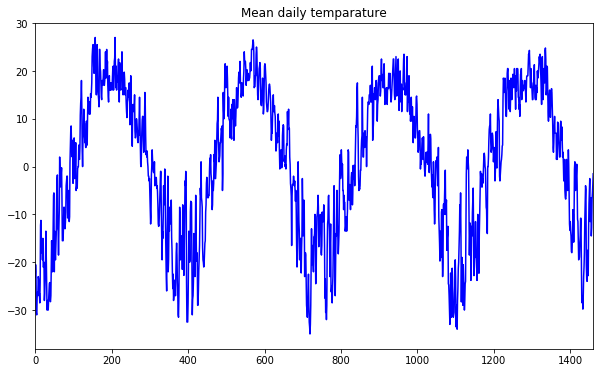

In [9]:
#Plot original time series on daily mean temparature
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)

df['Mean temparature'].plot(ax=ax, color='b')

ax.set_title('Mean daily temparature')

plt.show()

In [10]:
df['Month_Year'] = df["Date"].dt.strftime('%m-%Y')
df.set_index("Date", inplace=True)
df

,Mean temparature,Month_Year
Date,,
1988-01-01,-23.0,01-1988
1988-01-02,-20.5,01-1988
1988-01-03,-22.0,01-1988
1988-01-04,-30.5,01-1988
1988-01-05,-31.0,01-1988
...,...,...
1991-12-27,-12.8,12-1991
1991-12-28,-6.8,12-1991
1991-12-29,-5.5,12-1991


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 1988-01-01 to 1991-12-31
Data columns (total 2 columns):
Mean temparature    1461 non-null float64
Month_Year          1461 non-null object
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [12]:
#Calculate month wise statistics
monthly_stats = df.groupby('Month_Year')['Mean temparature'].aggregate([np.mean, np.median, np.std])

monthly_stats.head()

,mean,median,std
Month_Year,,,
01-1988,-22.137097,-23.0,5.260640
01-1989,-17.129032,-18.0,8.250725
01-1990,-15.112903,-12.0,6.606764
01-1991,-23.038710,-24.5,7.095570
02-1988,-19.025862,-19.5,8.598522


In [13]:
#Let's create month and year columns and sort by them to reorder the rows
monthly_stats['Year'] = monthly_stats.index.map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats.index.map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))

monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head(10)

,mean,median,std,Year,Month
Month_Year,,,,,
01-1988,-22.137097,-23.000,5.260640,1988,01
02-1988,-19.025862,-19.500,8.598522,1988,02
03-1988,-8.258065,-9.250,5.341459,1988,03
04-1988,2.641667,1.875,5.057720,1988,04
05-1988,11.290323,11.000,6.254364,1988,05
06-1988,19.291667,19.000,3.909032,1988,06
07-1988,19.048387,18.500,3.073692,1988,07
08-1988,17.379032,18.000,3.183205,1988,08
09-1988,10.675000,10.750,3.880294,1988,09


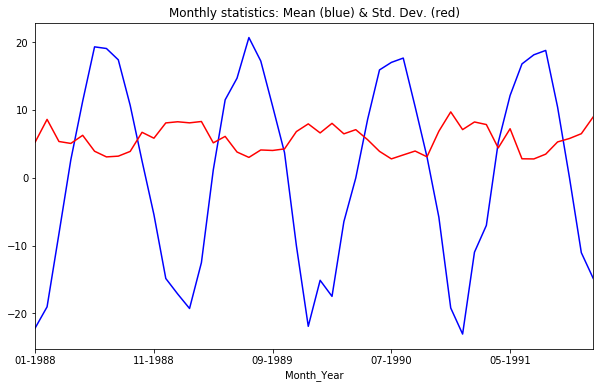

In [14]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)')

plt.show()

### Moving statistics

In [15]:
#Now we will calculate weekly moving average on the original time series of mean daily temparature
weekly_moving_average = df['Mean temparature'].rolling(7).mean()

In [16]:
#Now we will calculate monthly moving average on the original time series of mean daily temparature
monthly_moving_average = df['Mean temparature'].rolling(30).mean()

In [17]:
#Let's caluclate the weekly and monthly avergaes with a stride of length 2
weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

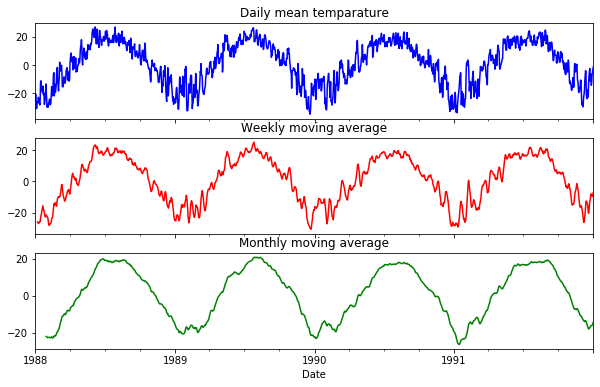

In [18]:
#Plot original time series and weekly moving average
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(10, 6)

df['Mean temparature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temparature')

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average')

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average')

plt.show()

## Differencing
The basic idea of differencing is taking differences between successive occurrences of the
time series Δxt = xt - xt-1 such that Δxt have constant mean and variance and hence can be
treated as a stationary series

### First-order differencing
First order differencing implies taking differences between successive realizations of the
time series so that the differences Δxt are irregular variations free from any long run trend
or seasonality. The random walk model discussed in the last chapter is a sum of subsequent
random variations and is given by xt = xt-l + Єt where Єt is a zero mean random number from
normal distribution. Random walks are characterized by long sequence of upward or
downward trends. Besides, they take unforeseen changes in direction. Based on these
characteristics, random walks are non-stationary. However, the first differences (Δxt of a
random walk are equal to the random noise Єt. Hence the residuals remaining after firstorder
differencing of a random walk is a zero-mean stationary series.

the first-order differences are independent and identically distributed with a constant mean and a constant variance and hence have no autocorrelation.

In [19]:
djia_df = pd.read_excel('Data/DJIA_Jan2016_Dec2016.xlsx', parse_dates=True, index_col=0)
djia_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [20]:
djia_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [21]:
#We would be using the 'Close' values of the DJIA to illustrate Differencing
first_order_diff = djia_df['Close'].diff(1)

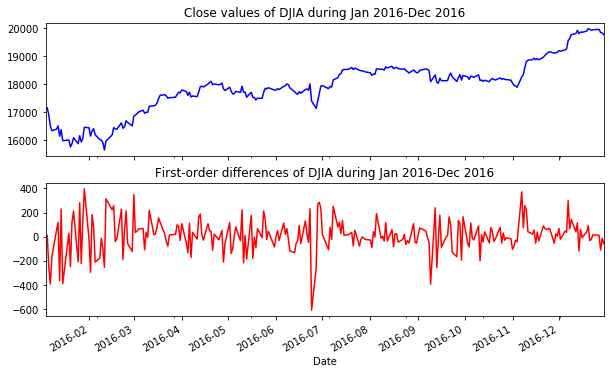

In [22]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(10, 6)

djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')

first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')

plt.show()

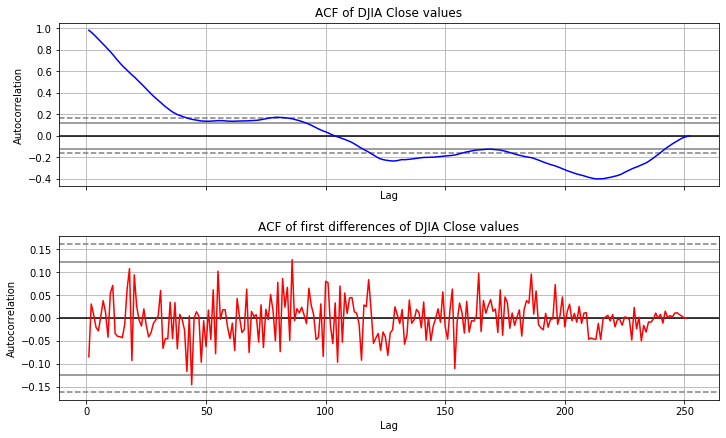

In [23]:
from pandas.plotting import autocorrelation_plot

#Let us plot the ACFs of original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(10, 6)

autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')

autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA Close values')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

* A quick way to verify whether the first-order differencing has stationarized a time series is
to plot the ACF function and run the Ljung-Box test for the differenced series. The Ljung-
Box test determines if the observed auto-correlation is statistically significant. **The null
hypothesis of the Ljung-Box test is that the time series consist of random variations and
lacks predictable autocorrelation while the alternate hypothesis proposes that the observed
autocorrelation is not random.**

* Now we will perform the Ljung-Box test on the ACFs
of the original time series and the first-differences.
For running the test we will limit upto 20 lags

* Let us obtain the confidence intervls, Ljung-Box Q-statistics and p-values
for the original DJIA Close values

In [24]:
from statsmodels.tsa import stattools

acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(djia_df['Close'],
                                                                 unbiased=True,
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

C:\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


* Let us check if at confidence level 95% (alpha=0.05)
if the null hypothesis is rejected at any of the lags

In [25]:
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 1.0693767753675923e-55
Null hypothesis is rejected at lag = 1 for p-val = 9.994326469626719e-107
Null hypothesis is rejected at lag = 2 for p-val = 3.514318635466178e-156
Null hypothesis is rejected at lag = 3 for p-val = 8.306783142362536e-204
Null hypothesis is rejected at lag = 4 for p-val = 1.3385232646526703e-249
Null hypothesis is rejected at lag = 5 for p-val = 1.1920943365339414e-293
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.

* **The above results show statistically significant ACF in the original DJIA Close values**

* Let us obtain the confidence intervals, Ljung-Box Q-statistics and p-values for the differenced DJIA Close values

In [26]:
acf_first_diff, confint_first_diff, qstat_first_diff, pvalues_first_diff = stattools.acf(first_order_diff.iloc[1:],
                                                     unbiased=True,
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

* Let us check if at confidence level of 95% (alpha = 0.05) if the null hypothesis is rejected at any of the lags

In [27]:
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))
        

Null hypothesis is accepted at lag = 0 for p-val = 0.17569800898040225
Null hypothesis is accepted at lag = 1 for p-val = 0.3538300853009234
Null hypothesis is accepted at lag = 2 for p-val = 0.5531395640331849
Null hypothesis is accepted at lag = 3 for p-val = 0.6985127807558775
Null hypothesis is accepted at lag = 4 for p-val = 0.7891580120671382
Null hypothesis is accepted at lag = 5 for p-val = 0.8772903282781711
Null hypothesis is accepted at lag = 6 for p-val = 0.901277483583282
Null hypothesis is accepted at lag = 7 for p-val = 0.9429823162379645
Null hypothesis is accepted at lag = 8 for p-val = 0.9485916556521746
Null hypothesis is accepted at lag = 9 for p-val = 0.9377977943700336
Null hypothesis is accepted at lag = 10 for p-val = 0.8937612607433124
Null hypothesis is accepted at lag = 11 for p-val = 0.9152190930215198
Null hypothesis is accepted at lag = 12 for p-val = 0.9263245243892939
Null hypothesis is accepted at lag = 13 for p-val = 0.9350725554001179
Null hypothesis 

* The above results show that ACF is essentially random in the differenced DJIA Close values

### Second-order differencing
In some cases, first-order differencing does not stationarize the time series and therefore the
data is differenced another time to generate a stationary time series. Therefore, the secondorder
differenced time series is generated as follows:

$ x"_{t} = x'_{t} - x'_{t-1} = (x_{t} - x_{t-1}) - (x_{t-1} - x_{t-2}) = x_{t} - 2x_{t-1} + x_{t-2}$

The time series resulting from second-order differencing have N - 2 observations. It is almost never required to perform differencing of order higher than second order.

### Seasonal differencing
When a time series exhibits seasonality of a known time period of m time indices, it can be
stationarized by taking seasonal differences between xt and xt-m. These differences taken at
lags of length m are indicative of the seasons or quarters in a year. In this case m = 12 and
the differences are taken between original observations that are a year apart from each
other. The seasonal differences can be expressed as follows:

$ x'_{t} = x_{t} - x_{t-m} = Є_{t}$

* To demonstrate the effect of seasonal differencing we would revisit the time series on daily mean temperatures of Fisher River. We have already seen the original time series and the monthly mean, both of which apparently exhibit strong seasonal behavior. The autocorrelation in this series is computed and plotted using the `autocorrelation_plot` function from the pandas.plotting API and is shown in the following graph. The autocorrelation_plot function is useful to check the presence of statistically significant autocorrelation in a time series.

In [28]:
daily_temp= pd.read_csv("Data/mean-daily-temperature-fisher-river.csv", parse_dates=["Date"], index_col=0)
daily_temp.head()

,Mean temparature
Date,
1988-01-01,-23.0
1988-01-02,-20.5
1988-01-03,-22.0
1988-01-04,-30.5
1988-01-05,-31.0


In [29]:
#Calculate monthly mean temperature
monthly_mean_temp = daily_temp['Mean temparature'].resample('M').mean()

print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head(10)

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
1988-06-30    19.291667
1988-07-31    19.048387
1988-08-31    17.379032
1988-09-30    10.675000
1988-10-31     2.467742
Freq: M, Name: Mean temparature, dtype: float64

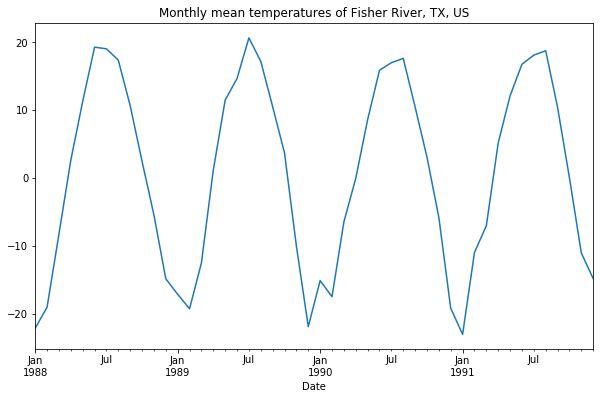

In [30]:
#Plot the monthly mean temparature
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax)

plt.show()

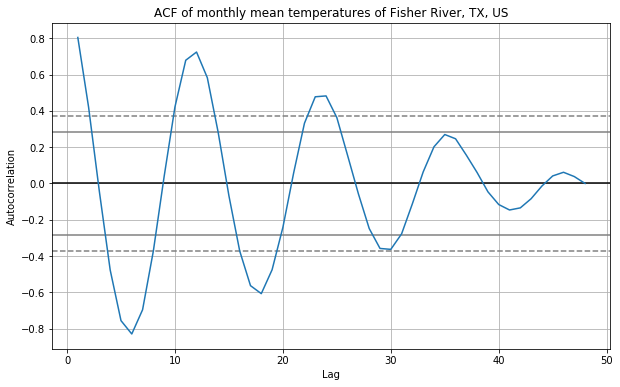

In [31]:
from pandas.plotting import autocorrelation_plot

#Plot ACF of the monthly mean temparature using pandas.tools.plotting.autocorrelation_plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
autocorrelation_plot(monthly_mean_temp, ax=ax)

plt.show()

* As shown in the following figure, it also plots the upper and lower confidence intervals for a confidence levels of 95% (alpha = 0.05; thick dotted line) and 99% (alpha = 0.01; thin dotted line). The ACF of the monthly mean temperature of Fisher River swings above and below the 99% confidence intervals for several lags. 

* The ACF of the monthly mean temperature of Fisher River swings above and below the 99% confidence intervals for several lags. **Therefore, the monthly mean temperatures form a non-stationary time series due to seasonality.**

* We attempt to stationarize the time series of monthly mean by taking seasonal differences.
The seasonal differencing leaves null values in its first 12 elements, which are removed before further analysis:

In [32]:
#Take seasonal differences with a period of 12 months on monthly mean temperatures
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

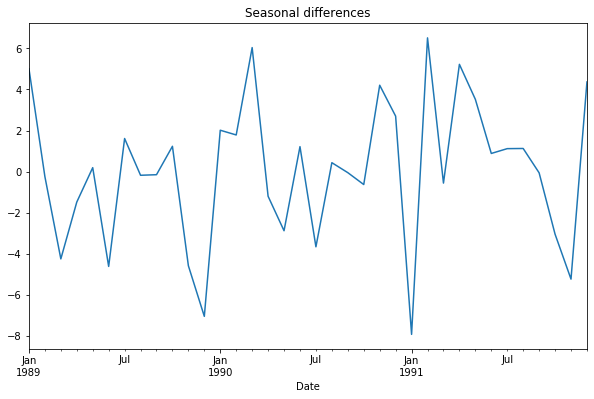

In [33]:
#Plot the seasonal differences
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)

plt.show()

* The seasonal differences appears to be random variations as shown in the above figure:

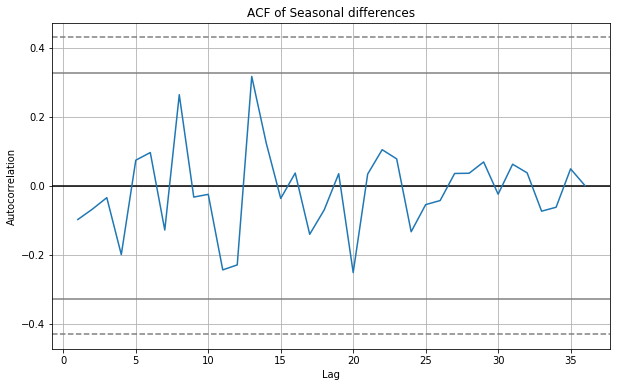

In [34]:
#Plot the seasonal differences
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax)

plt.show()

* We again use the autocorrelation_plot function to generate the ACF of the differenced
series and the confidence intervals at 99% of confidence level. We can see in the above figure that the ACF never crosses the 99% confidence intervals for lags varying from 0 to
over 35:

* The actual p-values are confirmed by running the stattools.acf function on the monthly
mean data as follows:

In [35]:
from statsmodels.tsa import stattools

#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10

_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)


* The Ljung-Box test is performed on the seasonally differenced series as well:

In [36]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff, unbiased=True,
                                            nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)


* There are no lags for which the null hypothesis of Ljung-Box’s test is rejected.

* At this point, it is important to note that in some cases a first-order differencing is done after running the seasonal differences to achieve stationarity in the transformed data. The resulting series $x"_{t}$   can be computed from the original as follows:

$x"_{t} = x'_{t} - x'_{t-1} = (x_{t} - x_{t-m}) - (x_{t-1} - x_{t-m-1})$

* The choice of a differencing strategy can be determined through exploratory data analysis like the ones described so far. However, when it is difficult to determine what transformations are required for stationarization, the ADF test is performed for a definitive guidance.

### Augmented Dickey-Fuller test
**The statistical tests for objectively determining whether differencing is required to
stationarize a time series are known as unit root tests.** There are several such tests of which we discuss the ADF test is one of the unit root tests, that is most commonly used for verifying non-stationarity in the original time series. According to the ADF test, in the presence of autocorrelation, the first-order differences x' t of the original series can be expressed as a linear regression model of the previous time index and first-order differences up to a lag of m times indices.

* Let us apply the ADF to verify stationarity in the US Airlines monthly aircraft miles data
collected during 1963 to 1970. We will use the adfuller function from the
statsmodels.tsa.stattools API to run the tests.

In [37]:
air_miles =pd.read_csv("Data/us-airlines-monthly-aircraft-miles-flown.csv", index_col=0)
air_miles.head()

,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,
1963-01,6827.0
1963-02,6178.0
1963-03,7084.0
1963-04,8162.0
1963-05,8462.0


In [38]:
air_miles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 1963-01 to 1970-12
Data columns (total 1 columns):
U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970    96 non-null float64
dtypes: float64(1)
memory usage: 1.5+ KB


In [39]:
#Let's rename the 2nd column
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'
                         },
                inplace=True
                )

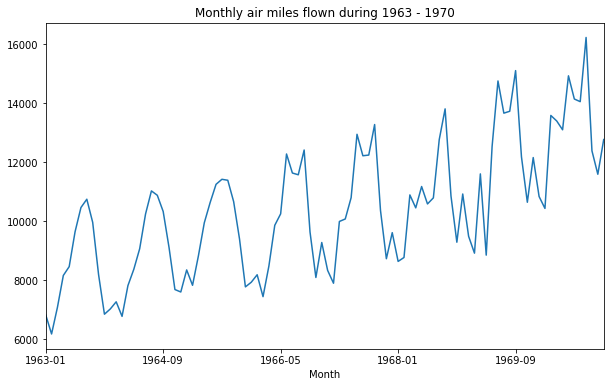

In [40]:
#Plot the time series of air miles flown
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
air_miles['Air miles flown'].plot(ax=ax)
ax.set_title('Monthly air miles flown during 1963 - 1970')

plt.show()

* It is evident that the time series has an uptrend as
well as seasonality and therefore is non-stationary, which will be verified by the ADF test.

In [41]:
adf_result = stattools.adfuller(air_miles['Air miles flown'], autolag='AIC')

* the keyword
argument autolag='AIC' instructs the function to choose a suitable number of lags for the
test by maximizing the Akaike Information Criteria (AIC). Alternately, the test can run on the number of lags given by the user into the keyword argument maxlag. We prefer using
the AIC over giving a lag to avoid trial and error in finding the best lag required for
running the test.

In [42]:
print('p-val of the ADF test in air miles flown:', adf_result[1])

p-val of the ADF test in air miles flown: 0.9945022811234028


* Unsurprisingly, the p-value of the ADF test is 0.9945, which confirms our understanding
from the exploratory data analysis. The adfuller function returns several values in a
tuple. We have used the adf_result variable to store the results and refer to its second
element adf_result[1] to retrieve the p-value of the test. Other interesting things
returned by the function are usedlag, which is the number of lags actually used for
running the test and critical values of the test statistic at 1%, 5%, and 10% levels of
confidence.

In [43]:
[adf_result[m] for m in range(6)]

[1.0229489778119756,
 0.9945022811234028,
 11,
 84,
 {'1%': -3.510711795769895,
  '5%': -2.8966159448223734,
  '10%': -2.5854823866213152},
 1356.2366247658094]

## Time series decomposition

### Moving averages

* Taking moving averages have an effect of smoothing the original time series by eliminating random noise.

* Let us demonstrate moving averages and their smoothing effect through the example on IBM stock prices from 1962 to 1965.

In [44]:
ibm_df = pd.read_csv("Data/ibm-common-stock-closing-prices.csv", parse_dates=["Date"], index_col=0)
ibm_df.head()

,IBM common stock closing prices
Date,
1962-01-02,572.00
1962-01-03,577.00
1962-01-04,571.25
1962-01-05,560.00
1962-01-08,549.50


In [45]:
ibm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 1962-01-02 to 1965-12-31
Data columns (total 1 columns):
IBM common stock closing prices    1008 non-null float64
dtypes: float64(1)
memory usage: 15.8 KB


In [46]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)
ibm_df.head()

,Close_Price
Date,
1962-01-02,572.00
1962-01-03,577.00
1962-01-04,571.25
1962-01-05,560.00
1962-01-08,549.50


In [47]:
#To illustrate the idea of moving average we compute a weekly moving average taking
#a window of 5 days instead of 7 days because trading happens only during the weekdays.

ibm_df['5-Day Moving Avg'] = ibm_df['Close_Price'].rolling(5).mean()

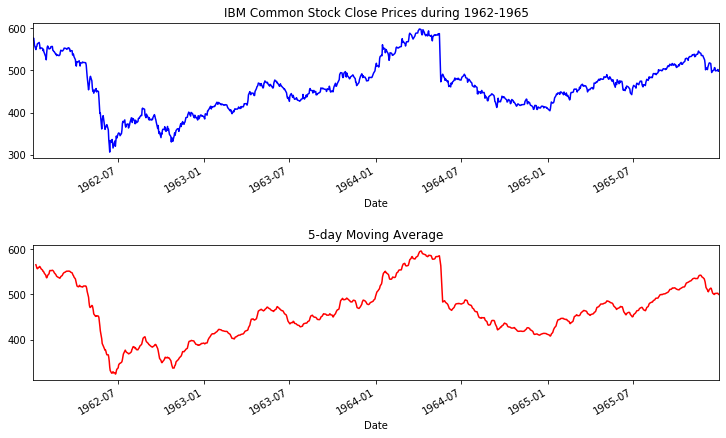

In [48]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax, color='b')
ax.set_title('IBM Common Stock Close Prices during 1962-1965')

ax = fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax, color='r')
ax.set_title('5-day Moving Average')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

* The original time series, as shown in blue in the following figure, has irregular movements due to random noise. The 5 day (or 5- order) MA, displayed in red, is smoother than the original series and shows an estimate of the trend-cycle pattern. The 5-day MA has apparently produced some smoothing effect on the original time series as seen in the above figure.

* Let's plot six moving averages, and for IBM stock prices for up to the first 45 days.

In [49]:
#Calculate the moving averages using 'rolling' and 'mean' functions
MA2 = ibm_df['Close_Price'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()

MA4 = ibm_df['Close_Price'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()

MA3 = ibm_df['Close_Price'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()

In [50]:
#Let's remove NaN from the above variables
MA2 = MA2.loc[~pd.isnull(MA2)]
TwoXMA2 = TwoXMA2.loc[~pd.isnull(TwoXMA2)]

MA4 = MA4.loc[~pd.isnull(MA4)]
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

MA3 = MA3.loc[~pd.isnull(MA3)]
ThreeXMA3 = TwoXMA4.loc[~pd.isnull(ThreeXMA3)]

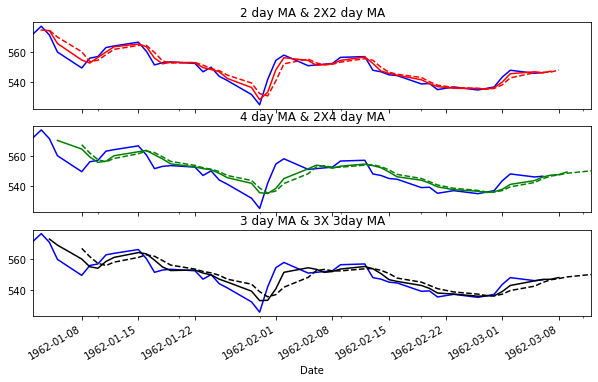

In [51]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(10, 6)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
MA2.iloc[:45].plot(color='r', linestyle = '-', ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
MA4.iloc[:45].plot(color='g', linestyle = '-', ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='g', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
MA3.iloc[:45].plot(color='k', linestyle = '-', ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='k', linestyle = '--', ax=axarr[2])
axarr[2].set_title('3 day MA & 3X 3day MA')

plt.show()

* As illustrated, the smoothness of the resulting MAs improves with increase in the order m and number of repetitions n.

### Seasonal adjustment using moving average

The time series represents quarterly beer production is taken during March 1956 to June 1994.

In [52]:
beer_df = pd.read_csv("Data/quarterly-beer-production-in-aus-March 1956-June 1994.csv", index_col=0)
beer_df.head()

,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
Quarter,
1956Q1,284.4
1956Q2,212.8
1956Q3,226.9
1956Q4,308.4
1957Q1,262.0


In [53]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 1956Q1 to 1994Q2
Data columns (total 1 columns):
Quarterly beer production in Australia: megalitres. March 1956 ? June 1994    154 non-null float64
dtypes: float64(1)
memory usage: 2.4+ KB


In [54]:
#Rename the 2nd column
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':
                        'Beer_Prod'
                       },
               inplace=True
              )

In [55]:
#In order to remove seasonal patterns let us calculate 2X4 quarter moving average
MA4 = beer_df['Beer_Prod'].rolling(window=4).mean()

TwoXMA4 = MA4.rolling(window=2).mean()

TwoXMA4 = TwoXMA4.loc[pd.notnull(TwoXMA4)]

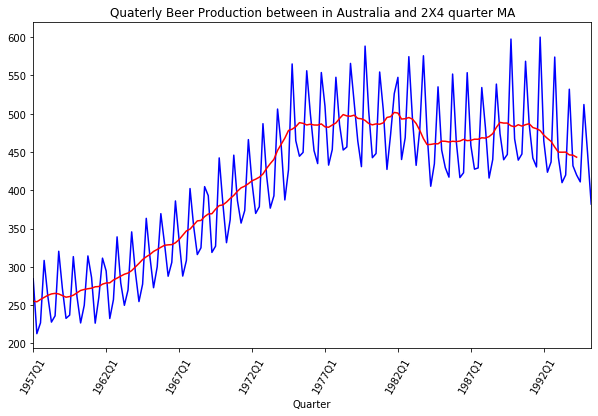

In [56]:
#Let's plot the original time series and the seasonal moving averages
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
beer_df['Beer_Prod'].plot(ax=ax, color='b', linestyle='-')

TwoXMA4.plot(ax=ax, color='r', linestyle='-')

plt.xticks(rotation=60)
ax.set_title('Quaterly Beer Production between in Australia and 2X4 quarter MA')

plt.show()

* The original time series on the quarterly beer productions has trend as well as seasonality
and therefore is not stationary. Let us see if we can stationarize the time series by first
removing the trend component and then taking seasonal differences.

In [57]:
#Let's compute the residuals after removing the trend
residuals = beer_df['Beer_Prod']-TwoXMA4
residuals = residuals.loc[pd.notnull(residuals)]

In [58]:
residuals.head()

Quarter
1957Q1     6.6750
1957Q2   -26.5125
1957Q3   -21.3500
1957Q4    60.3000
1958Q1     9.0625
Name: Beer_Prod, dtype: float64

* The residuals left after removing the trend-cycle component are plotted in the following figure:

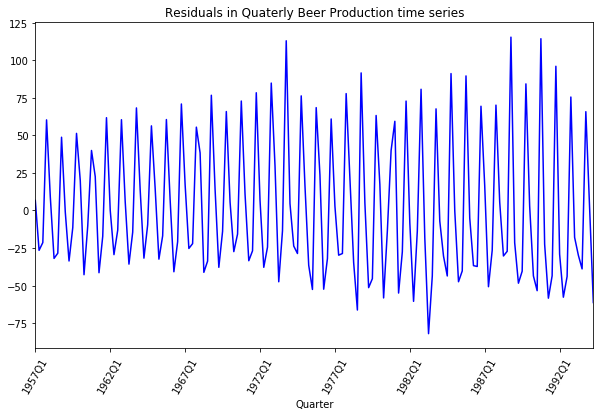

In [59]:
#Let's plot the residuals
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
residuals.plot(ax=ax, color='b', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Residuals in Quaterly Beer Production time series')

plt.show()

* At this point we will check whether the residuals are already stationarized (though unlikely!) by plotting the autocorrelation function along with the 99% confidence intervals. To get this plot, which is shown here, we would make use of the autocorrelation_plot function from the pandas.plotting API:

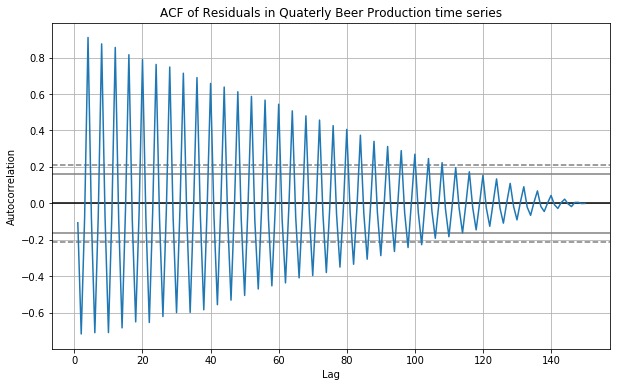

In [60]:
#Let's plot the autocorrelation function of the residuals
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals, ax=ax)
ax.set_title('ACF of Residuals in Quaterly Beer Production time series')

plt.show()

* Clearly, the residuals have a strong autocorrelation with the ACF jumping outside the confidence intervals for several values of lags. So we would need to take seasonal difference on the residuals. The period of seasonality can be determined based on the fact that the original data is obtained from all quarters of the years and shows seasonality of the quarter.
* This means that the residuals in quarter one of a year is close in magnitude to the residuals from quarter one of the preceding and succeeding years. This observation makes us take differences over periods of four time units as follows:

In [61]:
#Let's compute quarterly differecing to remove quaterly seasonality
residuals_qtr_diff = residuals.diff(4)

In [62]:
#Remove null values
residuals_qtr_diff = residuals_qtr_diff.loc[~pd.isnull(residuals_qtr_diff)]

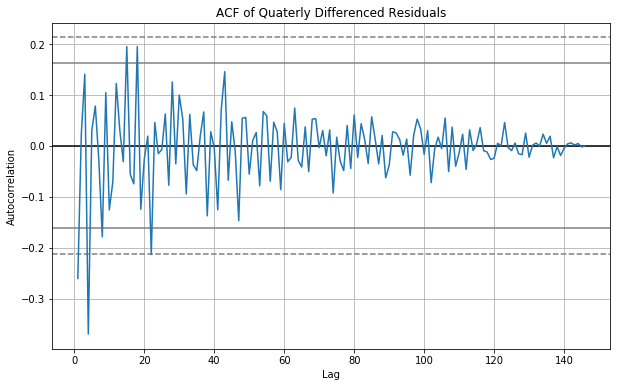

In [63]:
#Let's plot the autocorrelation function of the residuals
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals_qtr_diff, ax=ax)
ax.set_title('ACF of Quaterly Differenced Residuals')

plt.show()

* We expect the residuals_qtr_diff to be a series of random variations with no seasonality and predictable autocorrelation. To verify if this is the case, we run the autocorrelation_plot function on residuals_qtr_diff and obtain the following graph that has mostly randomly ACF. Besides, **the ACF falls outside the 99% confidence intervals only for two lags. This means that taking seasonal differences has stationarized the residuals.**

Our approach for stationarizing the quarterly beer production time series can be
summarized as follows:
1. Take seasonal (2X4) MA.
2. Compute residuals by removing the (2X4) MA from the original time series.
3. Check for randomness of the ACF of the residuals.
4. If the residuals' ACF is already random then the residuals are stationary, if not proceed to the next step.
5. Take seasonal differences on the residuals with periodicity of four and check for randomness of the ACF of the differenced series.

Hence, seasonal moving averages and seasonal differences on the residuals have  essentially stationarized the original time series.

### Weighted moving average

Observations close to the time index t are assigned higher weight, whereas those farther away get lesser weights. This approach of assigned different weights depending on proximity to the time index of interest generates better smoothing of the data.

### Time series decomposition using moving averages

Let us illustrate this approach of time series decomposition using moving averages through the time series on monthly aircraft mils flown by US Airlines.

We apply both additive and multiplicative models for this dataset.

* Let us demonstrate the addtive model using US Airlines monthly miles flown dataset.

In [64]:
air_miles = pd.read_csv('Data/us-airlines-monthly-aircraft-miles-flown.csv', index_col=0)
air_miles.head()

,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,
1963-01,6827.0
1963-02,6178.0
1963-03,7084.0
1963-04,8162.0
1963-05,8462.0


In [65]:
air_miles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 1963-01 to 1970-12
Data columns (total 1 columns):
U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970    96 non-null float64
dtypes: float64(1)
memory usage: 1.5+ KB


In [66]:
#Let's rename the 2nd column
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'
                         },
                inplace=True
                )

In [67]:
#Let us estimate the trend component by 2X12 monthly moving average
MA12 = air_miles['Air miles flown'].rolling(window=12).mean()
trendComp = MA12.rolling(window=2).mean()

In [68]:
trendComp

Month
1963-01             NaN
1963-02             NaN
1963-03             NaN
1963-04             NaN
1963-05             NaN
               ...     
1970-08    12870.416667
1970-09    12930.833333
1970-10    12986.166667
1970-11    13034.250000
1970-12    13099.291667
Name: Air miles flown, Length: 96, dtype: float64

In [69]:
#Let us now compute the residuals after removing the trend component
residuals = air_miles['Air miles flown'] - trendComp

#To find the sesonal compute we have to take monthwise average of these residuals
month = air_miles.index.map(lambda d: d[-2:])

In [70]:
month

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],
      dtype='object', name='Month')

In [71]:
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
monthwise_avg

,mean
Month,
01,-1288.482143
02,-1771.285714
03,42.077381
04,-62.976190
05,822.351190
06,2110.958333
07,1758.708333
08,1964.672619
09,2650.220238


In [72]:
#Number of years for which we have the data
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.values]*nb_years).reshape((12*nb_years,))
seasonalComp

array([-1288.48214286, -1771.28571429,    42.07738095,   -62.97619048,
         822.35119048,  2110.95833333,  1758.70833333,  1964.67261905,
        2650.2202381 ,    28.92261905, -1470.73214286,  -608.4702381 ,
       -1288.48214286, -1771.28571429,    42.07738095,   -62.97619048,
         822.35119048,  2110.95833333,  1758.70833333,  1964.67261905,
        2650.2202381 ,    28.92261905, -1470.73214286,  -608.4702381 ,
       -1288.48214286, -1771.28571429,    42.07738095,   -62.97619048,
         822.35119048,  2110.95833333,  1758.70833333,  1964.67261905,
        2650.2202381 ,    28.92261905, -1470.73214286,  -608.4702381 ,
       -1288.48214286, -1771.28571429,    42.07738095,   -62.97619048,
         822.35119048,  2110.95833333,  1758.70833333,  1964.67261905,
        2650.2202381 ,    28.92261905, -1470.73214286,  -608.4702381 ,
       -1288.48214286, -1771.28571429,    42.07738095,   -62.97619048,
         822.35119048,  2110.95833333,  1758.70833333,  1964.67261905,
      

In [73]:
#After deducting the trend and seasonal component we are left with irregular variations
irr_var = air_miles['Air miles flown'] - trendComp - seasonalComp

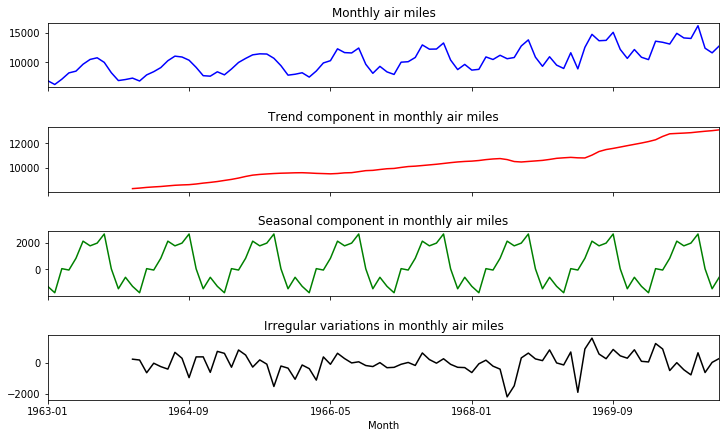

In [74]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(10,6)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

In [75]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')

In [76]:
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.06577411025730114


* **The additive decompostion has been able to reduce the p-value from 0.99 in case of the original time series (as shown previously) to 0.066 after decomposing.**

* Now we will attempt decomposition of the original time using a multiplicative model.


Computation of the trend-cycle component remain same. But the seasonal component is estimated as follows

In [77]:
#We start with the residuals left after removing the trend component
residuals = air_miles['Air miles flown'] / trendComp

#To find the sesonal compute we have to take monthwise average of these residuals
month = air_miles.index.map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])

#Number of years for which we have the data
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.values]*nb_years).reshape((12*nb_years,))

In [78]:
#After adjusting the trend and seasonal component we are left with irregular variations
irr_var = air_miles['Air miles flown'] / (trendComp * seasonalComp)

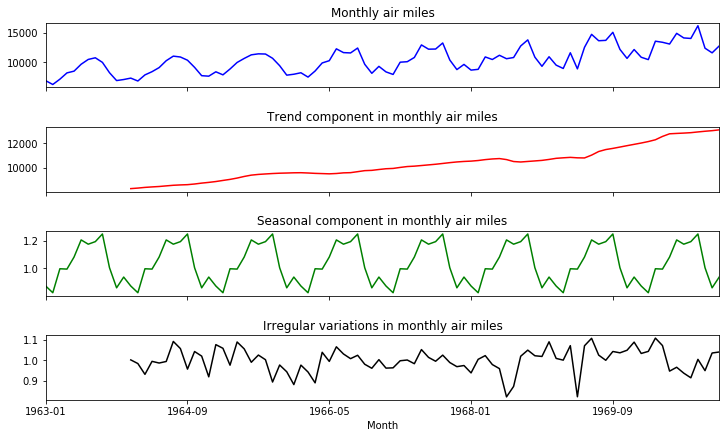

In [79]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(10,6)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

* Notice that the seasonal and irregular components are much smaller in magnitude than those obtained from the additive model:

In [80]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')

In [81]:
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.00017645280908370881


* **The p-val has further reduced to 0.000176.** The null hypothesis about non-stationarity of the irregular variations can be rejected at even a level of confidence of 99 % (alpha=0.01). This shows that the original time series has been de-stationarized to the stationary irregular variations. Besides we have estimates of both trend-cycle and seasonal components.

### Time series decomposition using statsmodels.tsa

* We will illustrate time series decomposition by the statsmodels package. Both additive and multiplicative models are demonstrated.
* Let us demonstrate the addtive model using Wisconsin Employment Jan. 1961 – OCt. 1975 dataset.

In [82]:
wisc_emp = pd.read_csv("Data/wisconsin-employment-time-series.csv", index_col=0)
wisc_emp.head()

,Employment
Month,
1961-01,239.6
1961-02,236.4
1961-03,236.8
1961-04,241.5
1961-05,243.7


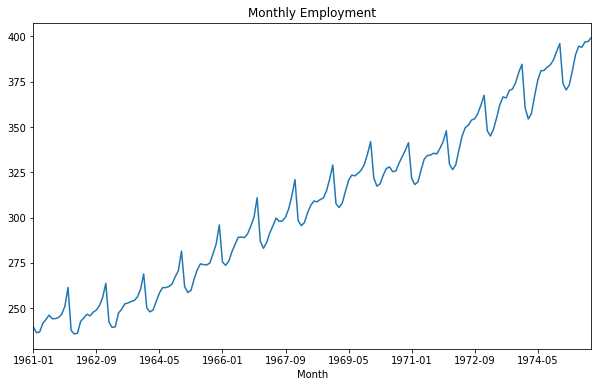

In [95]:
wisc_emp['Employment'].plot(figsize=(10,6))
plt.title("Monthly Employment")

plt.show()

In [83]:
#Run ADF test on the original time series
adf_result = stattools.adfuller(wisc_emp['Employment'], autolag='AIC')

In [84]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.9810000189539198


* A high p-value of 0.9810 for the ADF test on the monthly employment series indicates that
the original time series is non-stationary.

In [85]:
from statsmodels.tsa import seasonal

decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12,
                                              model='additive')

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


* The argument freq in the seasonal.seasonal_decompose is the periodicity of the seasonal behavior and the original time series being monthly observations we suspect a periodicity of 12, which can be verified through exploratory data analysis.

The trend-cycle, seasonal, and residual components of the decomposed time series are
accessible through the attributes of the object decompose_model returned by the
seasonal.seasonal_decompose function. These components are can be obtained from
the following attributes of the decompose_model:
- decompose_model.trend - Trend-cycle component
- decompose_model.seasonal - Seasonal component
- decompose_model.resid - Irregular variations

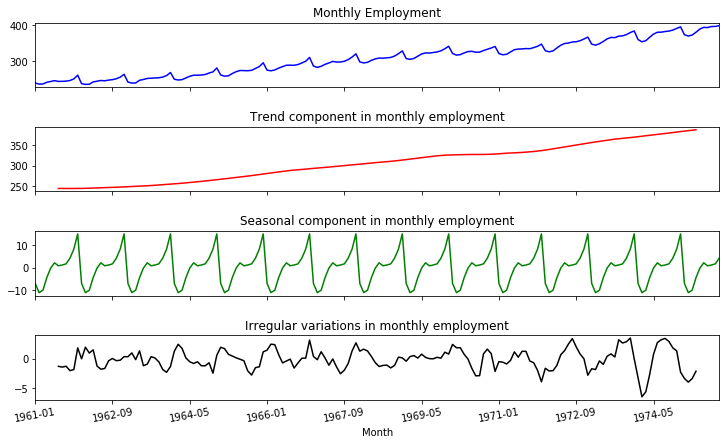

In [86]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(10,6)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

pd.Series(data=decompose_model.trend, index=wisc_emp.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in monthly employment')

pd.Series(data=decompose_model.seasonal, index=wisc_emp.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in monthly employment')

pd.Series(data=decompose_model.resid, index=wisc_emp.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in monthly employment')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)

plt.show()

In [87]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]],
                                autolag='AIC')

In [88]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.006560931634640984


* The additive decompostion has been able to reduce the p-value from 0.98 in case of the original time series to 0.066 after decomposing.

* Now we will attempt decomposition of the original time using a multiplicative model

In [89]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12,
                                              model='multiplicative')

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


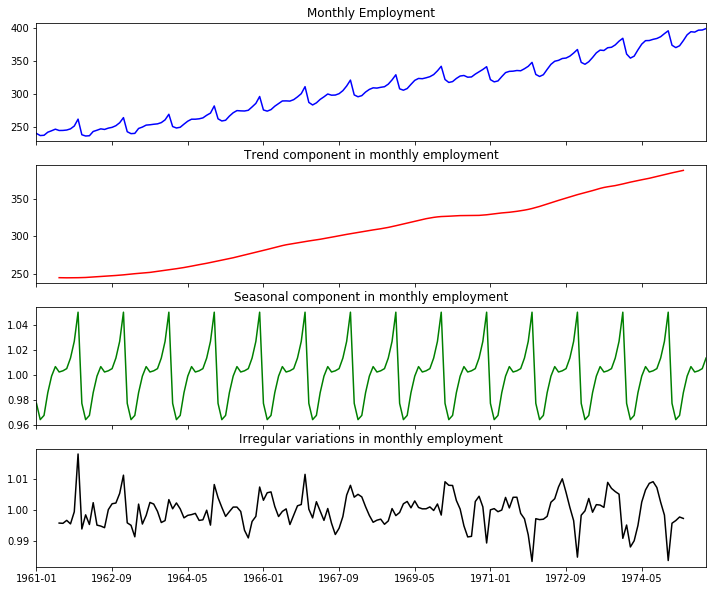

In [90]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(12, 10)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

axarr[1].plot(decompose_model.trend, color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly employment')

axarr[2].plot(decompose_model.seasonal, color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly employment')

axarr[3].plot(decompose_model.resid, color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly employment')

plt.show()

In [91]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]],
                                autolag='AIC')

In [92]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.0012347837267736824


* **The p-val has further reduced 0.00123.** 
* **At a confidence level of 99% (alpha=0.01) we can reject the null hypothesis of the ADF test and conclude that the residuals of the multiplicative decomposition model is a stationary series.**
* This shows that the original time series has been de-stationarized to the stationary irregular variations. Besides we have estimates of both trend-cycle and seasonal components.

Source: Practical Time Series Analysis - Dr. Avishek Pal, Dr. PKS Prakash